In [1]:
import pandas as pd
import numpy as np

In [2]:
import requests
import bs4 as bs

In [3]:
data_columns = ["Hospital Name","Specialty Type","Specializations count","Surgeries Count","Address","Emergency Contact number","Appointment & OPD timing","Total no. of beds","ICU Beds"]
df = pd.DataFrame(columns = data_columns)

In [4]:
hospitals = [
    "https://www.bajajfinservhealth.in/hospitals/ghaziabad/manipal-hospital-ghaziabad-ghaziabad",
    "https://www.bajajfinservhealth.in/hospitals/north-west-delhi/saroj-super-speciality-hospital-rohini",
    "https://www.bajajfinservhealth.in/hospitals/west-delhi/sehgal-neo-hospital-paschim-vihar",
    "https://www.bajajfinservhealth.in/hospitals/west-delhi/sonia-hospital-nangloi",
    "https://www.bajajfinservhealth.in/hospitals/north-west-delhi/anand-maya-multi-speciality-hospital-jahangirpuri",
    "https://www.bajajfinservhealth.in/hospitals/ghaziabad/paras-hospital-vaishali",
    "https://www.bajajfinservhealth.in/hospitals/west-delhi/handa-nursing-home-naraina",
    "https://www.bajajfinservhealth.in/hospitals/west-delhi/rg-stone-urology-and-laparoscopy-hospital-rajouri-garden-tagore-garden-extension",
]

In [9]:
headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246"}

for index,hospital in enumerate(hospitals):
    print("Extracting data from hospital {}".format(index+1))
    r = requests.get(hospital,headers=headers)
    class_name = "e-css-1tmuqsp"
    soup = bs.BeautifulSoup(r.content, 'lxml')

    content = soup.find("div",class_=class_name).find_all("tr")
    curr_list=[]
    for row in content:
        cells = row.find_all("td")
        curr_list.append(cells[1].text.strip())
    if (len(curr_list)>9):curr_list.pop(4)
    df.loc[len(df.index)]=curr_list

df.to_csv("hospital-data.csv")

print("data set created successfully")

Extracting data from hospital 1
Extracting data from hospital 2
Extracting data from hospital 3
Extracting data from hospital 4
Extracting data from hospital 5
Extracting data from hospital 6
Extracting data from hospital 7
Extracting data from hospital 8
data set created successfully


In [10]:
df.head()

,Hospital Name,Specialty Type,Specializations count,Surgeries Count,Address,Emergency Contact number,Appointment & OPD timing,Total no. of beds,ICU Beds
0,Manipal Hospital - Ghaziabad,"Cardiology, Dermatology, Gastroenterology, Phy...",10,0,"Manipal Hospital - Ghaziabad,Manipal Hospital,...",01203535353,12:00 AM - 11:45 PM (Monday to Sunday),101,17
1,Saroj Super Speciality Hospital,"Cardiology, General Surgery, Physiotherapy, An...",14,0,"Saroj Super Speciality Hospital,Saroj Super Sp...",01127557201,8:30 AM - 8:00 PM (Monday to Sunday),154,60
2,Sehgal Neo Hospital,"General Surgery, Cardiology, Gastroenterology,...",12,0,"Sehgal Neo Hospital,Sehgal Neo Hospital, B - 3...",01145565656,8:00 AM - 9:00 PM (Monday to SaturdayMonday to...,50,10
3,Sonia Hospital,"Cardiology, Urology, Pediatrics, Oncology, Gen...",9,0,"Sonia Hospital,Sonia Hospital, 1, Rohtak Rd, G...",08750060162,9:00 AM - 11:00 AM (Monday to Sunday),70,18
4,Anand Maya Multi Speciality Hospital,"Cardiology, General Medicine, Pediatrics",3,0,"Anand Maya Multi Speciality Hospital,Anand May...",09577771111,"10:30 AM - 1:00 PM, 6:00 PM - 8:30 PM (Monday ...",20,0


## TASK 1 :
### allocate a hospital to a patient on the basis of proximity, availability of beds

#### (i) convert the string based addresses to exact latitute longitude locations in order to evaluate proximity of a patient


In [14]:
!pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 135.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 26.3 kB/s eta 0:00:00a 0:00:01


In [15]:
from geopy.geocoders import Nominatim
from geopy.geocoders import OpenCage

In [16]:
geolocator = OpenCage(api_key='fd274da5215646888f076a97ce68aa41')

In [17]:
def get_coordinates(address):
  location = geolocator.geocode(address,timeout=None)
  if (location is None):return (None,None)

  return (location.latitude,location.longitude)

In [18]:
df['Coordinates'] = df['Hospital Name'].apply(get_coordinates)

In [19]:
df['Coordinates']

0    (28.6551434, 77.4724531)
1     (28.7066786, 77.129405)
2       (28.658057, 77.09143)
3     (28.682627, 77.0524348)
4    (28.7299137, 77.1600821)
5    (23.9650359, 86.7907678)
6      (47.27482, -122.76375)
7         (45.7747, -86.5507)
Name: Coordinates, dtype: object

In [20]:
df.head()

,Hospital Name,Specialty Type,Specializations count,Surgeries Count,Address,Emergency Contact number,Appointment & OPD timing,Total no. of beds,ICU Beds,Coordinates
0,Manipal Hospital - Ghaziabad,"Cardiology, Dermatology, Gastroenterology, Phy...",10,0,"Manipal Hospital - Ghaziabad,Manipal Hospital,...",01203535353,12:00 AM - 11:45 PM (Monday to Sunday),101,17,"(28.6551434, 77.4724531)"
1,Saroj Super Speciality Hospital,"Cardiology, General Surgery, Physiotherapy, An...",14,0,"Saroj Super Speciality Hospital,Saroj Super Sp...",01127557201,8:30 AM - 8:00 PM (Monday to Sunday),154,60,"(28.7066786, 77.129405)"
2,Sehgal Neo Hospital,"General Surgery, Cardiology, Gastroenterology,...",12,0,"Sehgal Neo Hospital,Sehgal Neo Hospital, B - 3...",01145565656,8:00 AM - 9:00 PM (Monday to SaturdayMonday to...,50,10,"(28.658057, 77.09143)"
3,Sonia Hospital,"Cardiology, Urology, Pediatrics, Oncology, Gen...",9,0,"Sonia Hospital,Sonia Hospital, 1, Rohtak Rd, G...",08750060162,9:00 AM - 11:00 AM (Monday to Sunday),70,18,"(28.682627, 77.0524348)"
4,Anand Maya Multi Speciality Hospital,"Cardiology, General Medicine, Pediatrics",3,0,"Anand Maya Multi Speciality Hospital,Anand May...",09577771111,"10:30 AM - 1:00 PM, 6:00 PM - 8:30 PM (Monday ...",20,0,"(28.7299137, 77.1600821)"


In [21]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Manipal Hospital - Ghaziabad'),
  Text(1, 0, 'Saroj Super Speciality Hospital'),
  Text(2, 0, 'Sehgal Neo Hospital'),
  Text(3, 0, 'Sonia Hospital'),
  Text(4, 0, 'Anand Maya Multi Speciality Hospital'),
  Text(5, 0, 'Paras Hospital'),
  Text(6, 0, 'Handa Nursing Home'),
  Text(7, 0, 'RG Stone Urology And Laparoscopy Hospital - Rajouri Garden')])

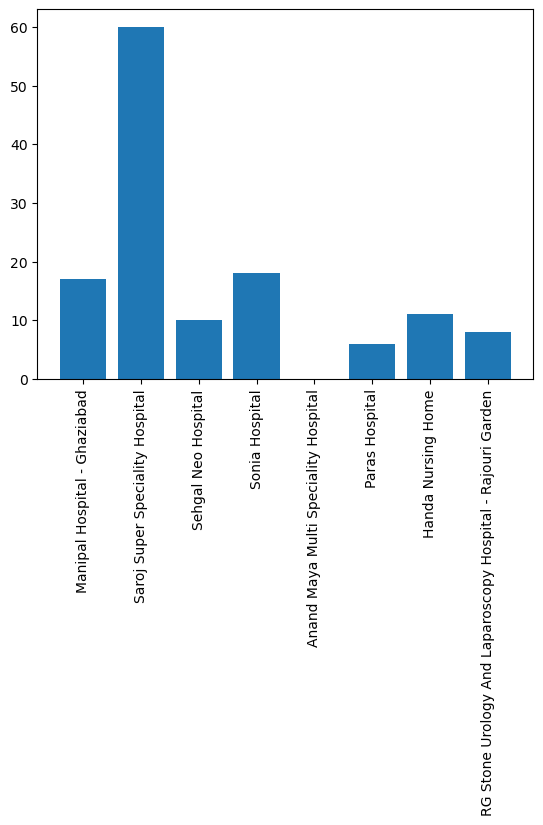

In [59]:
plt.bar(x=df['Hospital Name'],height=df['ICU Beds'].astype(int))
plt.xticks(rotation=90)

In [23]:
central_point = (28.6139, 77.209)

In [24]:
def generate_random_coordinates(central_point, radius):
    lat = central_point[0]+np.random.uniform(-radius,radius)
    lon = central_point[1]+np.random.uniform(-radius,radius)
    return lat, lon

In [25]:
requests=[]
for i in range(24):
  request_location = generate_random_coordinates(central_point,0.5)
  demand = np.random.randint(1,12)
  time_of_request = i+1

  request_dict = {
      'location':request_location,
      'demand':demand,
      'time':time_of_request
  }

  requests.append(request_dict)

In [26]:
def generate_availability(max_beds):
  r = int(0.6*int(max_beds))
  avail = np.random.randint(0,r+1)
  return avail

In [27]:
time_data_dict = {
    'time':list(),
    'request location':list(),
    'demand':list(),
    'hospital location':list(),
    'hospital':list()
}

In [28]:
from geopy import distance

In [29]:
def get_distance(source,dest):
  d = distance.distance(source,dest).km
  return d

In [30]:
for i in range(24):
  curr_request = requests[i]

  time_data_dict['request location'].append(curr_request['location'])
  time_data_dict['time'].append(curr_request['time'])
  time_data_dict['demand'].append(curr_request['demand'])

  availability_dict = {}

  for j in range(df.shape[0]):

    curr_hosp_name = df.iloc[j,0]
    curr_hosp_beds = df.iloc[j,8]

    availability_dict[curr_hosp_name] = (generate_availability(curr_hosp_beds),df.iloc[j,df.shape[1]-1])

  min_dist = float('inf')
  best_allocation=None
  best_location=None


  for key,value in availability_dict.items():

    beds = value[0]
    location = value[1]

    if (curr_request['demand']<=beds):
      d = get_distance(curr_request['location'], location)

      if (d<min_dist):
        min_dist=d
        best_allocation = key
        best_location=value[1]

  if best_allocation is not None:
    time_data_dict['hospital location'].append(best_location)
    time_data_dict['hospital'].append(best_allocation)
  else:
    time_data_dict['hospital location'].append(None)
    time_data_dict['hospital'].append(None)


In [31]:
time_data = pd.DataFrame(time_data_dict)
time_data.head()

,time,request location,demand,hospital location,hospital
0,1,"(28.941657365154125, 76.78846782091154)",7,"(28.682627, 77.0524348)",Sonia Hospital
1,2,"(28.546655036030163, 76.7891238201976)",1,"(28.682627, 77.0524348)",Sonia Hospital
2,3,"(28.6804554909236, 77.51671806046451)",3,"(28.6551434, 77.4724531)",Manipal Hospital - Ghaziabad
3,4,"(29.052792215250925, 77.10612816240443)",4,"(28.7066786, 77.129405)",Saroj Super Speciality Hospital
4,5,"(28.267154009608817, 77.59668621521682)",5,"(28.6551434, 77.4724531)",Manipal Hospital - Ghaziabad


In [32]:
time_data.isna().sum()

time                 0
request location     0
demand               0
hospital location    1
hospital             1
dtype: int64

In [33]:
time_data.shape

(24, 5)

In [34]:
time_data[time_data.isna().any(axis=1)]

,time,request location,demand,hospital location,hospital
11,12,"(28.134753949992685, 77.61537392427302)",11,None,None


In [35]:
time_data = time_data.dropna()

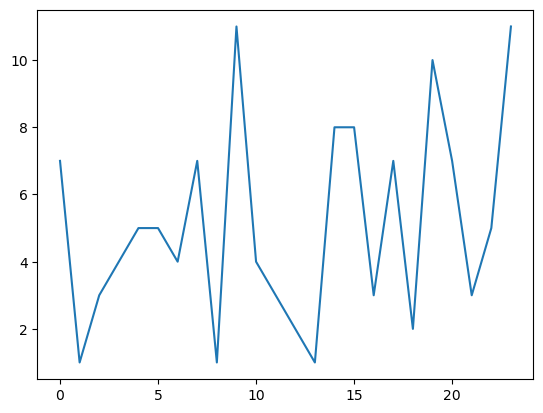

In [36]:
plt.plot(time_data['demand'])

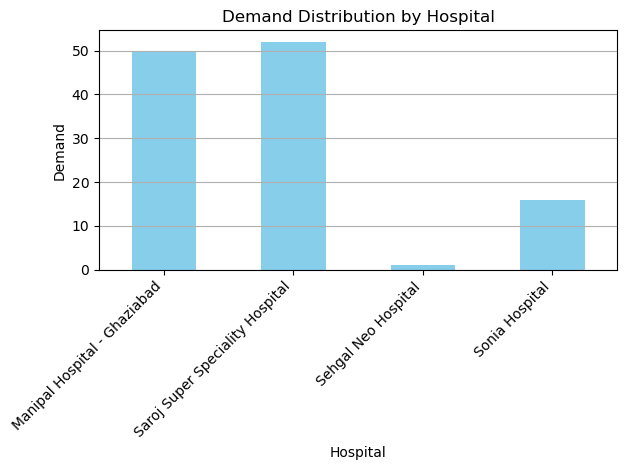

In [37]:
demand_by_hospital = time_data.groupby('hospital')['demand'].sum()

demand_by_hospital.plot(kind='bar', color='skyblue')
plt.xlabel('Hospital')
plt.ylabel('Demand')
plt.title('Demand Distribution by Hospital')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
time_df = time_data.copy()

In [40]:
time_df['request lat'] = time_df['request location'].apply(lambda x : x[0])
time_df['request long'] = time_df['request location'].apply(lambda x : x[1])
time_df['hospital lat'] = time_df['hospital location'].apply(lambda x : x[0])
time_df['hospital long'] = time_df['hospital location'].apply(lambda x : x[1])

In [41]:
time_df.drop(['request location','hospital location'],axis=1)

,time,demand,hospital,request lat,request long,hospital lat,hospital long
0,1,7,Sonia Hospital,28.941657,76.788468,28.682627,77.052435
1,2,1,Sonia Hospital,28.546655,76.789124,28.682627,77.052435
2,3,3,Manipal Hospital - Ghaziabad,28.680455,77.516718,28.655143,77.472453
3,4,4,Saroj Super Speciality Hospital,29.052792,77.106128,28.706679,77.129405
4,5,5,Manipal Hospital - Ghaziabad,28.267154,77.596686,28.655143,77.472453
5,6,5,Manipal Hospital - Ghaziabad,28.162251,77.303289,28.655143,77.472453
6,7,4,Saroj Super Speciality Hospital,28.697610,77.178436,28.706679,77.129405
7,8,7,Saroj Super Speciality Hospital,28.997886,77.257476,28.706679,77.129405
8,9,1,Manipal Hospital - Ghaziabad,28.116979,77.344756,28.655143,77.472453
9,10,11,Saroj Super Speciality Hospital,29.113757,76.932048,28.706679,77.129405


In [42]:
spatial_data = time_df[['request lat','request long']].values

In [43]:
scaler = StandardScaler()
spatial_data_normalized = scaler.fit_transform(spatial_data)

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(spatial_data_normalized)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


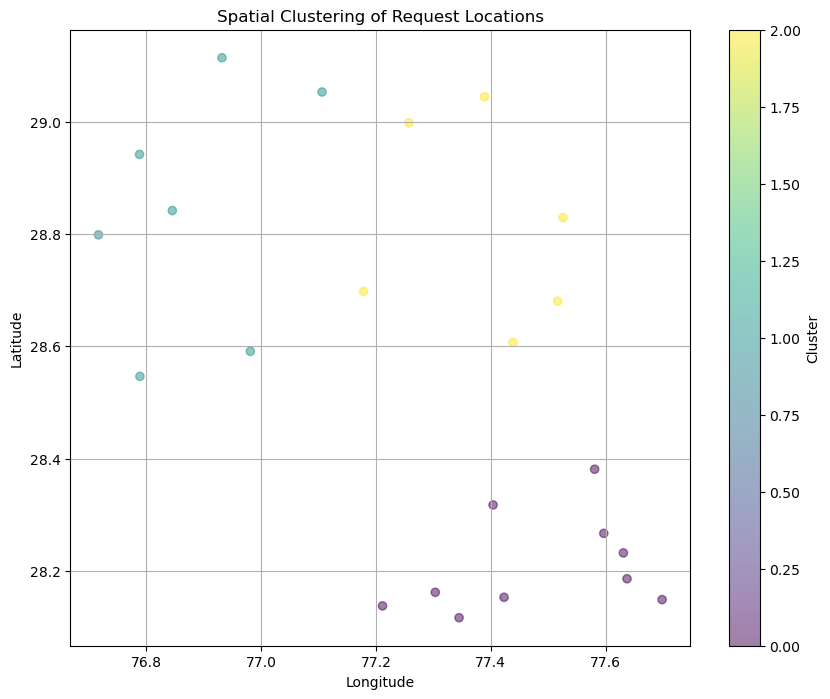

In [45]:
import matplotlib.pyplot as plt

latitude = time_df['request lat']
longitude = time_df['request long']
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Clustering of Request Locations')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [46]:
spatial_hosp_data = time_df[['hospital lat','hospital long']].values

In [47]:
scaler = StandardScaler()
spatial_hosp_normalized = scaler.fit_transform(spatial_data)

In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_hosp = kmeans.fit_predict(spatial_hosp_normalized)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
hospital_names = time_df['hospital']

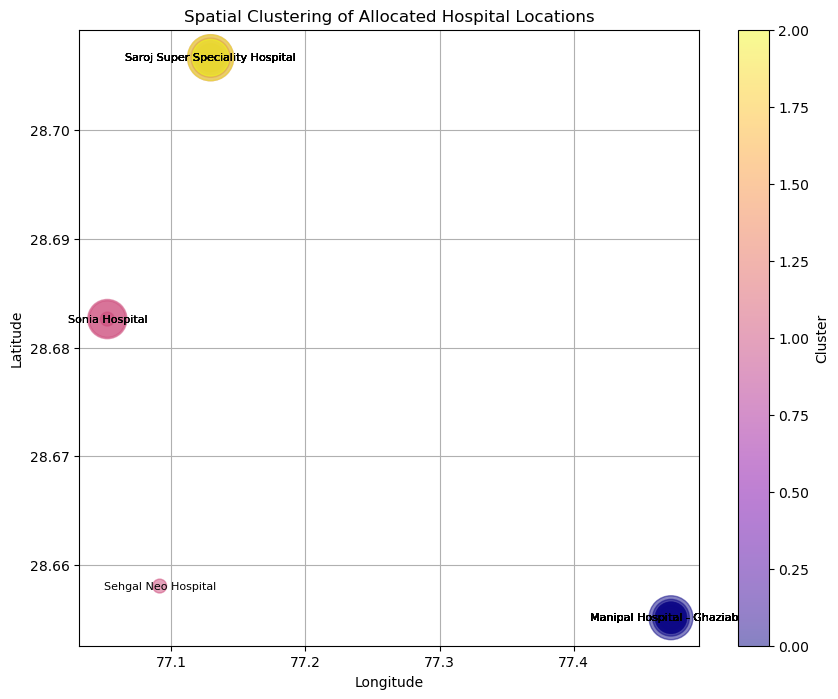

In [50]:
import matplotlib.pyplot as plt

latitude = time_df['hospital lat']
longitude = time_df['hospital long']
plt.figure(figsize=(10, 8))

plt.scatter(longitude, latitude, c=clusters_hosp, cmap='plasma', marker='o', alpha=0.5,s=time_df['demand']*100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Clustering of Allocated Hospital Locations')
plt.colorbar(label='Cluster')

for index, row in time_df.iterrows():
    plt.text(row['hospital long'], row['hospital lat'], row['hospital'], fontsize=8, ha='center', va='center')

plt.grid(True)
plt.show()


In [51]:
def calculate_avg_time(dist,speed):
  time = 2*dist/speed
  return time

In [52]:
speeds = [40,60,80,100,120]

In [53]:
service_times = []

In [54]:
for speed in speeds:

  service_times.append(
      pd.Series(
      [

      calculate_avg_time(get_distance(s,d),speed)
      for s,d in
      zip(time_data['request location'],
      time_data['hospital location'])

      ]))

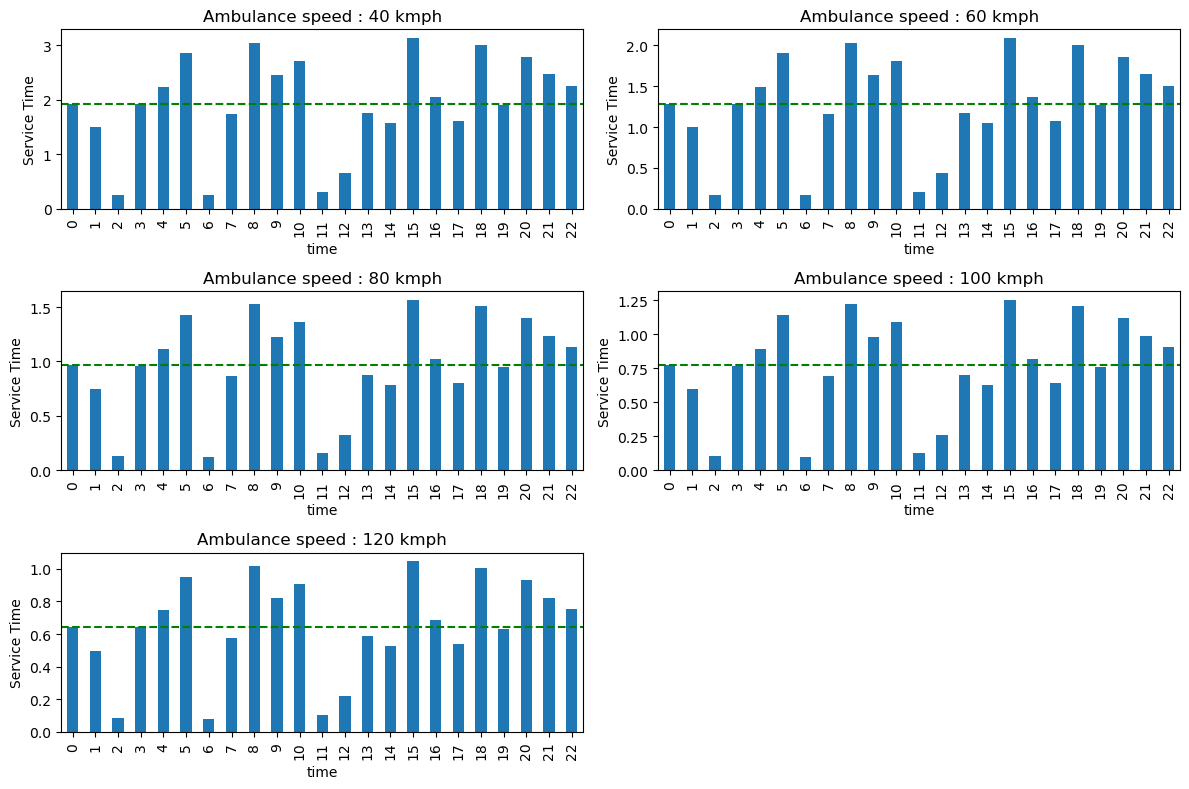

In [55]:
import matplotlib.pyplot as plt

num_series = len(service_times)
rows = int(np.ceil(num_series**0.5))
cols = int(np.ceil(num_series/rows))

fig, axes = plt.subplots(rows,cols,figsize=(12,8))

for i,series in enumerate(service_times):
    row=i//cols
    col=i%cols

    series.plot(kind='bar', ax=axes[row, col])
    axes[row, col].axhline(y=series.mean(), color='g', linestyle='--', label='Avg. Time')
    plt.plot()

    axes[row,col].set_title("Ambulance speed : {} kmph".format(speeds[i]))
    axes[row,col].set_xlabel("time")
    axes[row,col].set_ylabel("Service Time")

    fig.tight_layout()

if num_series<rows*cols:
    for i in range(num_series,rows*cols):
        row = i//cols
        col = i%cols
        axes[row,col].axis('off')

plt.show()